In [6]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go



df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade



ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

In [ ]:
from ydata_profiling import ProfileReport



profile = ProfileReport(df)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Separate features (X) and target (y) from the DataFrame
X = df.drop('Class', axis=1)
y = df['Class']



In [17]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.3, 
                                                            random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, 
                                                            test_size=0.2, 
                                                            random_state=42)


In [18]:
X_train = scaler.fit_transform(X_train) 
X_validate = scaler.transform(X_validate)  
X_test = scaler.transform(X_test)  

w_p = y_train.value_counts()[0] / len(y_train)  
w_n = y_train.value_counts()[1] / len(y_train) 

print(f"Fraudulent transaction weight: {w_n}")
print(f"Non-Fraudulent transaction weight: {w_p}")


Fraudulent transaction weight: 0.0017994745785028623
Non-Fraudulent transaction weight: 0.9982005254214972


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from xgboost import plot_importance

def score(true_labels, predictions, probabilities=None, model=None, feature_names=None, is_train=True):
    report_df = pd.DataFrame(classification_report(true_labels, predictions, output_dict=True))
    
    if is_train:
        print(f"\nTraining Results for {model}:")
        print("================================================")
    else:
        print(f"\nTesting Results for {model}:")
        print("================================================")
    print(f" {accuracy_score(true_labels, predictions) * 100:.2f}%")
    print("------------------------------------------------")
    
    print(f"\n{report_df}")
    print("------------------------------------------------")
    

    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    




Training Results for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
 100.00%
------------------------------------------------

                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       

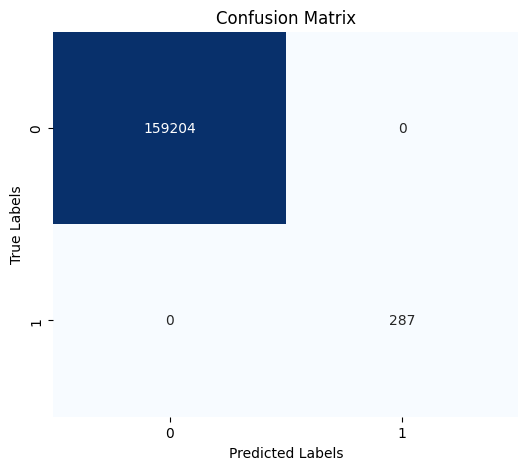


Testing Results for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
 99.96%
------------------------------------------------

                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.948718  0.999637      0.974212      0.999626
recall     

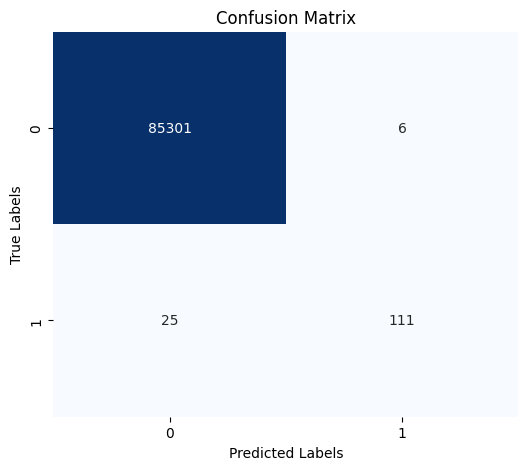

In [20]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import f1_score
import pandas as pd

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else None

xgb_model = XGBClassifier(eval_metric='aucpr')

xgb_model.fit(X_train, y_train)

train_predictions = xgb_model.predict(X_train)
test_predictions = xgb_model.predict(X_test)


score(
    true_labels=y_train,
    predictions=train_predictions,
    model=xgb_model,
    is_train=True
)

score(
    true_labels=y_test,
    predictions=test_predictions,
    model=xgb_model,
    is_train=False
)



[LightGBM] [Info] Number of positive: 287, number of negative: 159204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001799 -> initscore=-6.318459
[LightGBM] [Info] Start training from score -6.318459

Training Results for LGBMClassifier(metric='auc', objective='binary'):
 99.58%
------------------------------------------------

                       0           1  accuracy      macro avg   weighted avg
precision       0.999250    0.233333  0.995793       0.616292       0.997872
recall          0.996533    0.585366  0.995793       0.790949       0.995793
f1-score        0.997890    0.333664  0.995793       0.665777       0.996695
support    159204.000000  287.000000  0.995793  159491.000000  15949

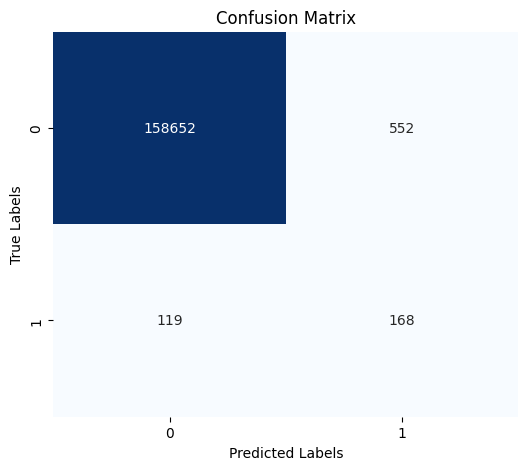


Testing Results for LGBMClassifier(metric='auc', objective='binary'):
 99.50%
------------------------------------------------

                      0           1  accuracy     macro avg  weighted avg
precision      0.999247    0.164760  0.994979      0.582003      0.997919
recall         0.995721    0.529412  0.994979      0.762567      0.994979
f1-score       0.997481    0.251309  0.994979      0.624395      0.996293
support    85307.000000  136.000000  0.994979  85443.000000  85443.000000
------------------------------------------------


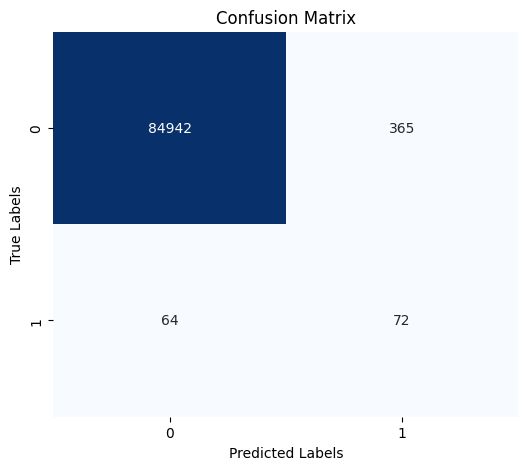

In [21]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import f1_score
import pandas as pd

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else None

lgbm_model = LGBMClassifier(objective='binary', metric='auc')

lgbm_model.fit(X_train, y_train)

train_predictions = lgbm_model.predict(X_train)
test_predictions = lgbm_model.predict(X_test)

score(
    true_labels=y_train,
    predictions=train_predictions,
    model=lgbm_model,
    is_train=True
)

score(
    true_labels=y_test,
    predictions=test_predictions,
    model=lgbm_model,
    is_train=False
)



Training Results for <catboost.core.CatBoostClassifier object at 0x7e445c425780>:
 100.00%
------------------------------------------------

                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996516  0.999994       0.998258       0.999994
f1-score        0.999997    0.998255  0.999994       0.999126       0.999994
support    159204.000000  287.000000  0.999994  159491.000000  159491.000000
------------------------------------------------


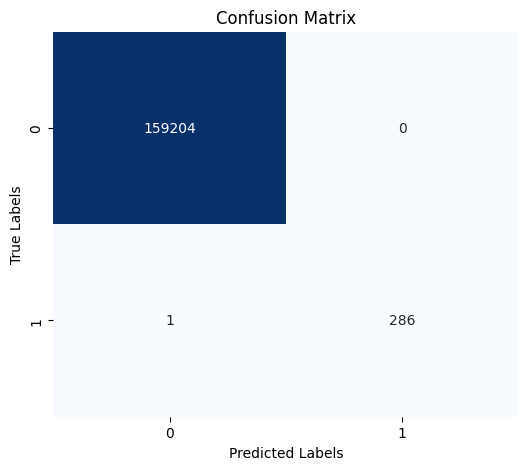


Testing Results for <catboost.core.CatBoostClassifier object at 0x7e445c425780>:
 99.96%
------------------------------------------------

                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601
support    85307.000000  136.000000  0.999614  85443.000000  85443.000000
------------------------------------------------


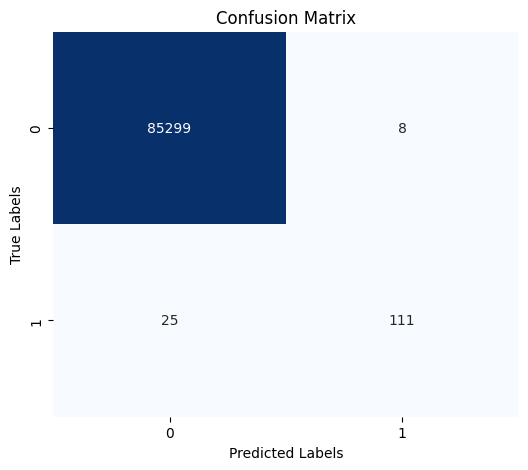

In [23]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
import pandas as pd

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else None

catboost_model = CatBoostClassifier(eval_metric='AUC', verbose=0)  # Suppress verbose output

catboost_model.fit(X_train, y_train)

train_predictions = catboost_model.predict(X_train)
test_predictions = catboost_model.predict(X_test)


score(
    true_labels=y_train,
    predictions=train_predictions,
    model=catboost_model,
    is_train=True
)

score(
    true_labels=y_test,
    predictions=test_predictions,
    model=catboost_model,
    is_train=False
)




Training Results for RandomForestClassifier(random_state=42):
 100.00%
------------------------------------------------

                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996516  0.999994       0.998258       0.999994
f1-score        0.999997    0.998255  0.999994       0.999126       0.999994
support    159204.000000  287.000000  0.999994  159491.000000  159491.000000
------------------------------------------------


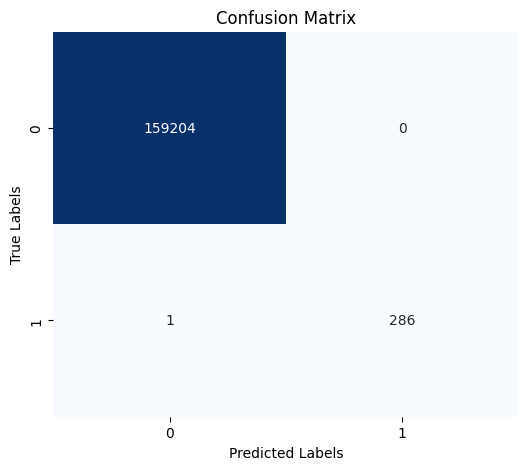


Testing Results for RandomForestClassifier(random_state=42):
 99.96%
------------------------------------------------

                      0           1  accuracy     macro avg  weighted avg
precision      0.999719    0.918033  0.999602      0.958876      0.999589
recall         0.999883    0.823529  0.999602      0.911706      0.999602
f1-score       0.999801    0.868217  0.999602      0.934009      0.999591
support    85307.000000  136.000000  0.999602  85443.000000  85443.000000
------------------------------------------------


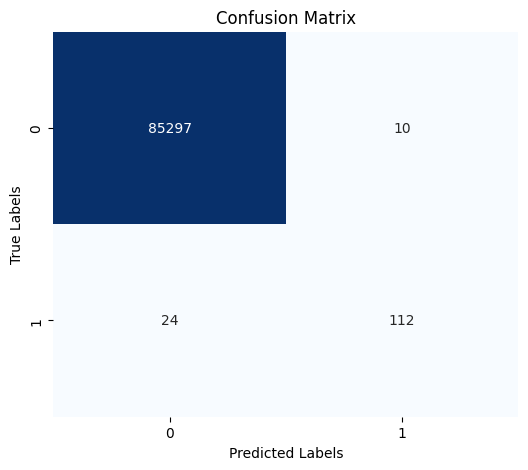

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else None

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

score(
    true_labels=y_train,
    predictions=train_predictions,
    model=rf_model,
    is_train=True
)

score(
    true_labels=y_test,
    predictions=test_predictions,
    model=rf_model,
    is_train=False
)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import pandas as pd

# Save feature names before preprocessing
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else None

# Initialize and train the SVM classifier with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
train_predictions = svm_model.predict(X_train)
test_predictions = svm_model.predict(X_test)


# Evaluation
score(
    true_labels=y_train,
    predictions=train_predictions,
    model=svm_model, 
    is_train=True
)

score(
    true_labels=y_test,
    predictions=test_predictions,
    model=svm_model,
    is_train=False
)


In [ ]:
from sklearn.metrics import f1_score
import pandas as pd

# Dictionary to store model scores
model_scores = {}

# List of models to evaluate
models = {
    'Random Forest': rf_model,
    'SVM': svm_model
    # Add more models here (e.g., XGBoost, LightGBM, etc.)
}

# Evaluate each model
for model_name, model in models.items():
    # Train predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Predicted probabilities (only if the model supports predict_proba)
    if hasattr(model, "predict_proba"):
        train_probabilities = model.predict_proba(X_train)[:, 1]
        test_probabilities = model.predict_proba(X_test)[:, 1]
    else:
        train_probabilities = None
        test_probabilities = None

    

    score(
        true_labels=y_train,
        predictions=train_predictions,
        model=model,
        is_train=True
    )

    score(
        true_labels=y_test,
        predictions=test_predictions,
        model=model,
        is_train=False
    )

# Print all scores
print("\nModel Scores:")
for model_name, scores in model_scores.items():
    print(f"{model_name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
